In [110]:
import pandas as pd 
import numpy as np 
import re
from tqdm import tqdm 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
import plotnine as pn
from pandas import DataFrame

In [54]:
data = pd.read_csv('/Users/senlinlidewo/pyprogram/cctv_news_report/cctv_news_dataset.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,news,report_day
0,中共中央政治局常委、全国人大常委会委员长张德江24号在人民大会堂与越共中央政治局委员、越南国...,2015-12-24
1,社论指出，“三农”向好，全局主动。农村改革发展的亮丽成绩，为我们战胜各种困难和风险增添了底气...,2015-12-25
2,习近平强调，新形势下办好解放军报，必须坚持军报姓党。解放军报是党领导和掌握、直接为党领导的人...,2015-12-26
3,前11月工业企业利润降幅收窄国内首条拥有完全自主知识产权的中低速磁浮快线在长沙试运行。该线路...,2015-12-27
4,在中央领导同志示范带动下，各级领导干部围绕“严以修身”，查找剖析理想信念、党性修养、道德情操...,2015-12-28
...,...,...
1487,届时，中央广播电视总台所属中央电视台综合频道、新闻频道、中文国际频道、4K超高清频道、中国国...,2021-03-04
1488,对于本次大会将审议全国人民代表大会组织法以及议事规则的修正草案，张业遂表示：“就是总结实践经...,2021-03-05
1489,央视网消息（新闻联播文字版）：国家卫生健康委今天（3月6日）通报，3月5日0—24时，31个...,2021-03-06
1490,掌声雷动的会场，充满热盼的目光。习近平总书记来到委员身边，议的都是家国事，聊的就是心里话。来...,2021-03-07


In [31]:
leader = {'习近平': 0, '李克强': 0, '栗战书': 0, '汪洋': 0, '王沪宁': 0, '赵乐际': 0, '韩正': 0}

In [57]:
province = {
 '北京': 0,
 '上海': 0,
 '天津': 0,
 '重庆': 0,
 '河北': 0,
 '山西': 0,
 '河南': 0,
 '辽宁': 0,
 '吉林': 0,
 '黑龙江': 0,
 '内蒙古': 0,
 '江苏': 0,
 '山东': 0,
 '安徽': 0,
 '浙江': 0,
 '福建': 0,
 '钓鱼岛': 0,
 '湖北': 0,
 '湖南': 0,
 '广东': 0,
 '广西': 0,
 '江西': 0,
 '四川': 0,
 '海南': 0,
 '贵州': 0,
 '云南': 0,
 '陕西': 0,
 '甘肃': 0,
 '青海': 0,
 '宁夏': 0,
 '新疆': 0,
 '香港': 0,
 '台湾': 0,
 '澳门': 0,
 '西藏': 0,
 '港澳': 0}

In [58]:
import jieba
jieba.add_word('栗战书')
def count_word(text,worddict,date):
    wordsls=jieba.lcut(text)
    for i in wordsls:
        if i in worddict:
            worddict[i] = worddict[i]+1
    wcls=list(worddict.items())
    return date,wcls


In [59]:
from tqdm import tqdm
result3 = []
for i in tqdm(range(1491)):
    if i < 0:
        continue
    else:
        q = count_word(data['news'][i],province,data['report_day'][i])
        result3.append(q)
#         leader = {'习近平': 0, '李克强': 0, '栗战书': 0, '汪洋': 0, '王沪宁': 0, '赵乐际': 0, '韩正': 0}
freq_words = pd.DataFrame(result3,columns = ['date','words'])
freq_words

100%|██████████| 1491/1491 [00:36<00:00, 40.62it/s]


,date,words
0,2015-12-24,"[(北京, 1), (上海, 1), (天津, 0), (重庆, 0), (河北, 0), ..."
1,2015-12-25,"[(北京, 8), (上海, 1), (天津, 2), (重庆, 0), (河北, 1), ..."
2,2015-12-26,"[(北京, 8), (上海, 1), (天津, 2), (重庆, 2), (河北, 1), ..."
3,2015-12-27,"[(北京, 11), (上海, 2), (天津, 2), (重庆, 2), (河北, 1),..."
4,2015-12-28,"[(北京, 18), (上海, 2), (天津, 5), (重庆, 3), (河北, 2),..."
...,...,...
1486,2021-03-03,"[(北京, 4734), (上海, 2612), (天津, 687), (重庆, 877),..."
1487,2021-03-04,"[(北京, 4742), (上海, 2612), (天津, 687), (重庆, 877),..."
1488,2021-03-05,"[(北京, 4744), (上海, 2613), (天津, 689), (重庆, 877),..."
1489,2021-03-06,"[(北京, 4745), (上海, 2614), (天津, 689), (重庆, 878),..."


In [60]:
def split_list(dict,data):
    list1 = list(dict)
    data[list1] = data['words'].apply(pd.Series)
    data = data.drop('words',axis=1)
    for i in list1:
        data[[i*2,i*3]] = data[i].apply(pd.Series)
        del data[i]
        del data[i*2]
        data[i]=data[i*3]
        del data[i*3]
    return data
freq_words1 = split_list(province,freq_words)
freq_words1

,date,北京,上海,天津,重庆,河北,山西,河南,辽宁,吉林,...,陕西,甘肃,青海,宁夏,新疆,香港,台湾,澳门,西藏,港澳
0,2015-12-24,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-25,8,1,2,0,1,1,2,1,3,...,0,1,0,0,0,0,0,0,0,0
2,2015-12-26,8,1,2,2,1,1,2,1,3,...,1,1,0,0,0,0,0,0,0,0
3,2015-12-27,11,2,2,2,1,1,2,1,3,...,1,1,0,0,0,0,0,0,0,0
4,2015-12-28,18,2,5,3,2,1,2,1,3,...,1,1,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,2021-03-03,4734,2612,687,877,855,549,761,466,458,...,654,633,379,487,1582,4221,367,946,1094,309
1487,2021-03-04,4742,2612,687,877,857,549,761,467,458,...,654,633,380,487,1585,4221,367,946,1096,309
1488,2021-03-05,4744,2613,689,877,860,552,761,468,459,...,658,633,380,487,1586,4235,367,947,1097,309
1489,2021-03-06,4745,2614,689,878,860,552,761,469,459,...,658,634,381,487,1587,4250,367,949,1097,315


In [61]:
freq_words1.to_csv('./province.csv')

In [98]:
a = freq_words1.iloc[[1490]]
b= a.transpose()


In [130]:
c = b.drop(b.index[[0]],axis=0)
c.sort_values(1490,inplace=True)
c

,1490
钓鱼岛,3
港澳,315
台湾,369
青海,389
吉林,459
辽宁,469
宁夏,489
山西,552
甘肃,639
陕西,658


In [117]:
data = freq_words1
list1 = list(province)
list2 = ['北京','江西']

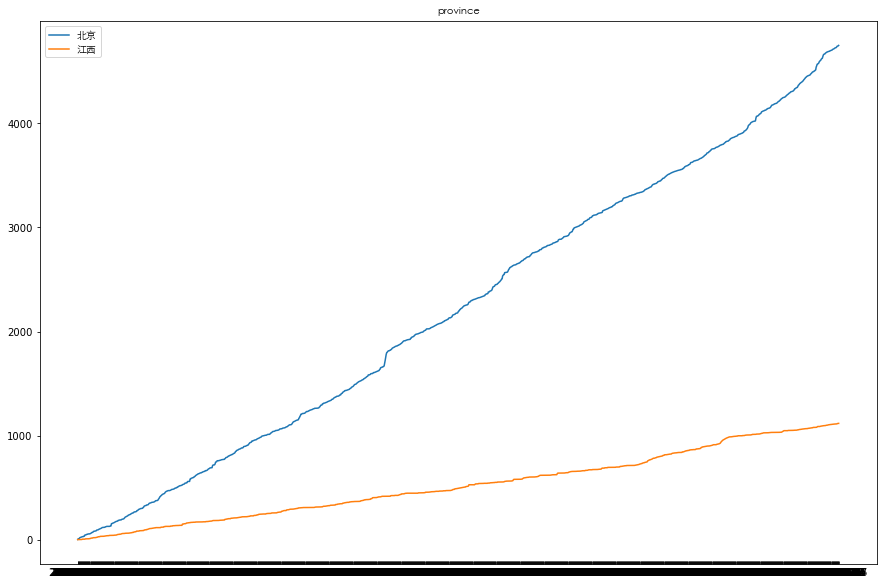

In [118]:
fig= plt.figure 
plt.rcParams['figure.figsize'] = (15, 10) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' 
for i in list2:
    x = data['date']
    y = data[i]
    plt.plot(x,y,label = i)
plt.title("province", fontproperties=font) 
plt.legend(prop = font)
plt.show()